In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Data & Explore

In [2]:
df = pd.read_csv('patient_pop_data.csv')

<AxesSubplot:>

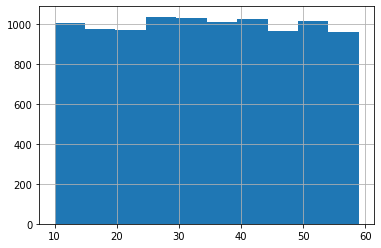

In [3]:
df.age.hist()

<AxesSubplot:>

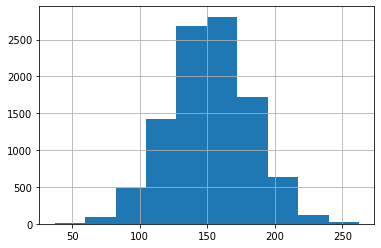

In [4]:
df.weight.hist()

# Cluster data

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [6]:
df_use = normalize(df, axis=0)

In [7]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_use)

In [8]:
kmeans.labels_

array([1, 1, 1, ..., 1, 0, 1], dtype=int32)

In [9]:
kmeans.cluster_centers_

array([[0.00926929, 0.00999915, 0.00944862, 0.00946172, 0.02130124,
        0.02132416, 0.01037123],
       [0.00922537, 0.0099989 , 0.00959858, 0.00960792, 0.00033048,
        0.00030619, 0.00970011]])

In [10]:
df['labels'] = kmeans.labels_

In [11]:
df.groupby('labels').mean()

,age,blood_oxygen,blood_sugar,hours_since_last_meal,num_medications,readmissions,weight
labels,,,,,,,
0,34.601319,96.995204,97.983813,3.445444,6.250600,5.182254,160.740836
1,34.437350,96.992799,99.538886,3.498680,0.096976,0.074412,150.339351


# Confirm intuition

In [12]:
from scipy.stats import pearsonr
print(pearsonr(kmeans.labels_, df.readmissions))

(-0.8475391983599618, 0.0)


<AxesSubplot:>

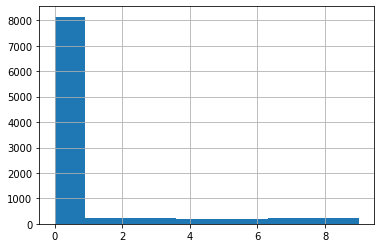

In [13]:
df.readmissions.hist()

In [14]:
multi_admission = df.readmissions > 1
print(pearsonr(kmeans.labels_, multi_admission))

(-0.8665388375062839, 0.0)


labels
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

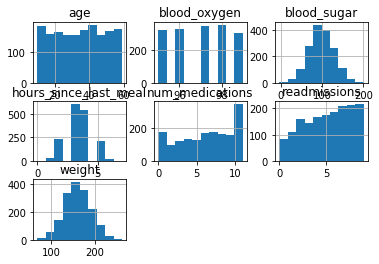

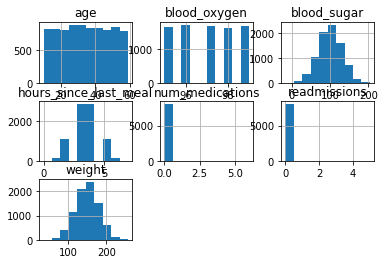

In [15]:
df.groupby('labels').hist()